1 (a.)
Find the equation of the hyperplane (in terms of w) WITHOUT solving a quadratic
programming (QP) problem. Make a sketch of the problem (i.e., plot the data, unique hyperplane
and corresponding dashed lines. Look at the notes on SVM posted on BlackBoard).

In [31]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

class_1_x = np.array([[2,2],[2,-2],[-2,-2],[-2,2]])
class_2_x = np.array([[1,1],[1,-1],[-1,-1],[-1,1]])

class_1_x1 = np.array(class_1_x[:,0])
class_1_x2 = np.array(class_1_x[:,1])

class_2_x1 = np.array(class_2_x[:,0])
class_2_x2 = np.array(class_2_x[:,1])

x1 = np.array([2,2,-2,-2,1,1,-1,-1])
x2 = np.array([2,-2,-2,2,1,-1,-1,1])
c = np.array([1,1,1,1,-1,-1,-1,-1])

## Plot the original data

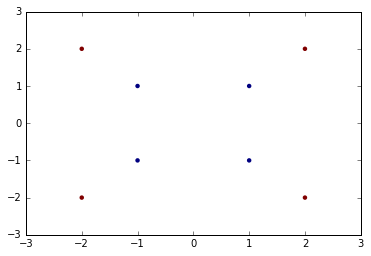

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

# plot x1,x2 data with c as the color vector, set the line width of the markers to 0
ax.scatter(x1, x2, c=c, lw=0);

### Use mapping function to calculate x1 and x2 for classes +1 and -1

In [12]:
class1_phi_1 = np.array([4 - class_1_x2[0] + abs(class_1_x1[0] - class_1_x2[0]),4 - class_1_x1[0] + abs(class_1_x1[0] - class_1_x2[0])])
class1_phi_2 = np.array([4 - class_1_x2[1] + abs(class_1_x1[1] - class_1_x2[1]),4 - class_1_x1[1] + abs(class_1_x1[1] - class_1_x2[1])])
class1_phi_3 = np.array([4 - class_1_x2[2] + abs(class_1_x1[2] - class_1_x2[2]),4 - class_1_x1[2] + abs(class_1_x1[2] - class_1_x2[2])])
class1_phi_4 = np.array([4 - class_1_x2[3] + abs(class_1_x1[3] - class_1_x2[3]),4 - class_1_x1[3] + abs(class_1_x1[3] - class_1_x2[3])])
class1_phi_1

array([2, 2])

In [13]:
class1_phi_2

array([10,  6])

In [14]:
class1_phi_3

array([6, 6])

In [15]:
class1_phi_4

array([ 6, 10])

Because the square root of 1^2 + 1^2 is square root of 2 and that is not greater than 2 so all values of class 2 stay unchanged

### Plot the mapping function values

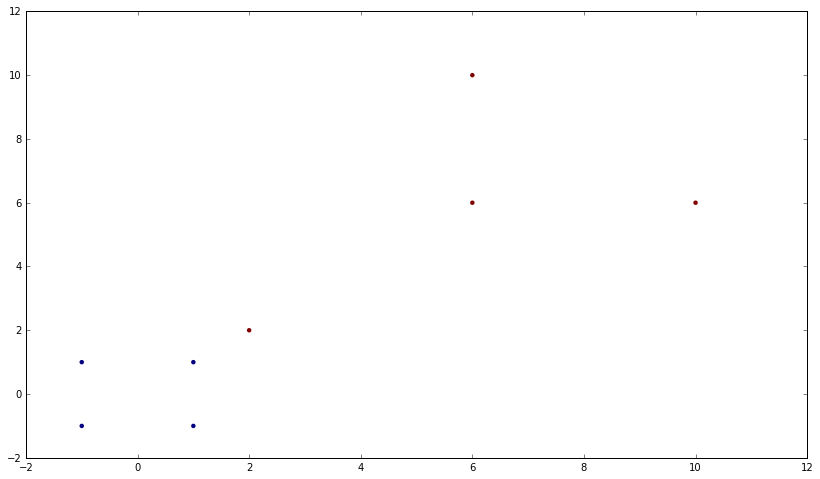

In [16]:
phi_x1 = np.array([2,10,6,6,1,1,-1,-1])
phi_x2 = np.array([2,6,6,10,1,-1,-1,1])

fig2 = plt.figure(figsize=(14,8))
ax2 = fig2.add_subplot(111)

# plot x1,x2 data with c as the color vector, set the line width of the markers to 0
ax2.scatter(phi_x1, phi_x2, c=c, lw=0);

### Plot the hyperplane with dashed lines through support vectors (2,2) and (1,1)

From looking at the above graph we can see that points 2,2 and 1,1 would make good choices for support vectors. 
We can plug these points into the equations for the dashed lines and w.  

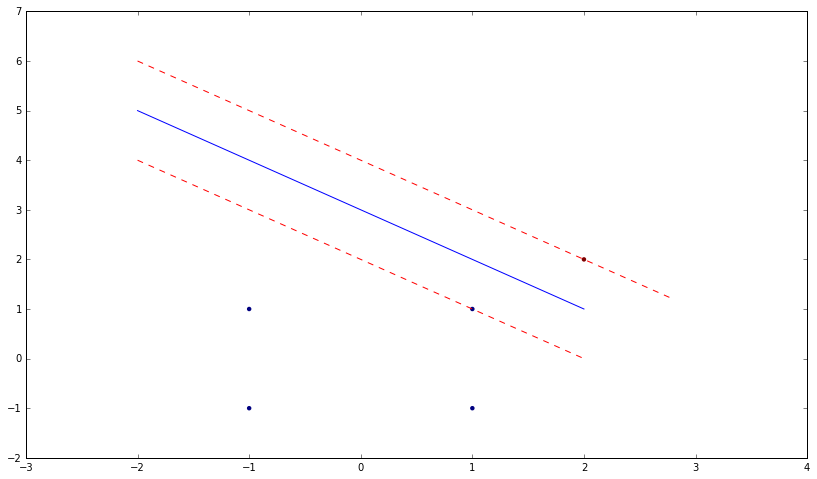

In [17]:
phi_x1 = np.array([2,1,1,-1,-1])
phi_x2 = np.array([2,1,-1,-1,1])
c = np.array([1,-1,-1,-1,-1])

fig2 = plt.figure(figsize=(14,8))
ax2 = fig2.add_subplot(111)

# plot x1,x2 data with c as the color vector, set the line width of the markers to 0
ax2.scatter(phi_x1, phi_x2, c=c, lw=0);

# plot the equation of the line between support vectors (2,2) and (1,1)
#x_vals = np.array([-2,-1,0,1,2,3])
#y_vals = np.array([5,4,3,2,1,0])
x_vals = np.linspace(-2.0, 3.0 ,num=5,endpoint=False)
y_vals = np.linspace(5,0,num=5,endpoint=False)

#plot the equation of the dashed line through support vector (2,2)
sp1_x_vals = np.linspace(-2.0, 4.0 ,num=5,endpoint=False)
sp1_y_vals = np.linspace(6.0, 0.0 ,num=5,endpoint=False)


#plot the equation of the dashed line through support vector (1,1)
sp2_x_vals = np.linspace(-2.0, 3.0 ,num=5,endpoint=False)
sp2_y_vals = np.linspace(4.0, -1.0 ,num=5,endpoint=False)

ax2.plot(x_vals,y_vals,'-')
ax2.plot(sp1_x_vals,sp1_y_vals,'r--')
ax2.plot(sp2_x_vals,sp2_y_vals,'r--');

$$y_{k}[(w_{1}x_{1}+w_{2}x_{2}+b] = 1  $$  
$$y_{k}[(w_{1}x_{1}+w_{2}x_{2}+b] = 1  $$  
$$ 1(w_{1}x1_{sv1}+w_{2}x2_{sv1}+b)=1  $$ 
$$ -1(w_1x1_{sv2}+w_{2}x2_{sv2}+b)=1   $$  

(2,2) and (1,1)  
$$1(w_{1}*2+w_{2}*2 +b) = 1  \Rightarrow 2w_{1}+2w_{2}+b = 1$$  
$$-1(w_{1}+w_{2}+b) = 1  \Rightarrow w_{1}+w_{2}+b = -1$$
multiply second equation by 2 and subtract from first:
$$[2w_{1}+2w_{2}+b = 1] - [2w_{1}+2w_{2}+2b = -2]  \Rightarrow  0+0-b=3\Rightarrow b=-3 $$  
b = -3

$$2w_{1}+2w_{2}-3 = 1  $$ 
$$w_{1}+w_{2}-3 = -1  $$ 
subtract 2nd from first $$\Rightarrow  w_{1}+w_{2}+0=2 \Rightarrow w_{1}+w_{2}=2 $$  

$$\sum_{k=1}^{n} \alpha_{k} y_{k}\varphi(x_{k}) = w$$  
$$[\alpha_{1}(1){2 \choose 2}] + [\alpha_{2}(-1){1 \choose 1}]= w$$
$$2\alpha_{1} - \alpha_{2} = w_{1}$$
$$2\alpha_{1} - \alpha_{2} = w_{2}$$

plug in to $$w_{1} + w_{2} = 2$$
$$[2\alpha_{1} - \alpha_{2}] + [2\alpha_{1} - \alpha_{2}] = 2  $$
$$\Rightarrow 2[2\alpha_{1} - \alpha_{2}] = 2 $$  
$$ \therefore 1+1=2, w_{1}=w_{2}=1  $$  

###### 1 b.) Calculate the margin.  
    We know that   
    $$2\alpha_{1} - \alpha_{2} = w_{1}$$
    $$2\alpha_{1} - \alpha_{2} = w_{2}$$ 

plug these in to our previous equation  $$w_{1} + w_{2} = 2$$  
$$[2\alpha_{1} - \alpha_{2}] + [2\alpha_{1} - \alpha_{2}] = 2  $$
$$\Rightarrow 2[2\alpha_{1} - \alpha_{2}] = 2 $$  
$$ \therefore 1+1=2, w_{1}=w_{2}=1  $$  
  
$$\sqrt{1^2+1^2} = \sqrt{2} = \|w\|$$  

equation for margin  
$$margin = \frac{2}{\|w\|}  $$ $$\Rightarrow \frac{2}{\sqrt{2}} $$
$$\therefore margin = \sqrt{2}  $$  

##### 1 c.) Find the alphas
$$\sum_{k=1}^{n(number of support vectors)} \alpha_{k} y_{k} = w$$  
$$\alpha_{1}y_{1} + \alpha_{2}y_{2}= 0$$
$$\alpha_{1}(1) + \alpha_{2}(-1)= 0$$
$$\alpha_{1} - \alpha_{2} = 0 $$ 
$$\alpha_{1} = \alpha_{2}  $$  
$$\alpha_{1} = \alpha_{2} = 1 $$

### Perform SVM with Matlab or R with RBF kernel (hyper parameter included) and plot the final result. Is this result different from the one you obtained by hand?

In [54]:
from sklearn import svm
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

In [55]:
data = np.array([[2,2,1],[2,-2,1],[-2,-2,1],[-2,2,1],[1,1,-1],[1,-1,-1],[-1,-1,-1],[-1,1,-1]])
x = data[:,0:2]
y = data[:,2]

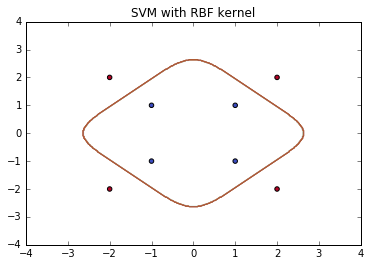

In [50]:
C = 1.0  # SVM regularization parameter

data = np.array([[2,2,1],[2,-2,1],[-2,-2,1],[-2,2,1],[1,1,-1],[1,-1,-1],[-1,-1,-1],[-1,1,-1]])
x = data[:,0:2]
y = data[:,2]


clf = svm.SVC(kernel = 'rbf',  gamma=0.7, C=C )
clf.fit(x, y)

h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks([w for w in range(-4,5)])
plt.yticks([w for w in range(-4,5)])
plt.title('SVM with RBF kernel')

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)

plt.show();

In [52]:
clf.support_vectors_

array([[ 1.,  1.],
       [ 1., -1.],
       [-1., -1.],
       [-1.,  1.],
       [ 2.,  2.],
       [ 2., -2.],
       [-2., -2.],
       [-2.,  2.]])

In [53]:
clf.decision_function

<bound method BaseSVC.decision_function of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)>

The difference in graphs is due to the different kernels. Using the provided phi function, we get a linear decision boundary in the hyperspace. We also only have two support vectors which are (2,2) and (1,1).   
Using the rbf kernel with SVM in the final graph we can see the decision boundary is nonlinear and is more circular in shape. All the vectors are support vectors (see above printout of clf.support_vectors_). 